In [59]:
import sympy
import math
from sympy import symbols, factor, expand, oo, Eq, solve

In [17]:
r= symbols("r")
R= symbols("R")

In [14]:
solve(2*k+k+5)

[-5/3]

In [60]:
from sympy import *

In [19]:
A=Matrix([[(1/r)+(1/R),(1/R)],[(1/R),(1/r)+(1/R)]])
A

Matrix([
[1/r + 1/R,       1/R],
[      1/R, 1/r + 1/R]])

In [20]:
B=A**-1
B

Matrix([
[(R*r + r**2)/(R + 2*r),        -r**2/(R + 2*r)],
[       -r**2/(R + 2*r), (R*r + r**2)/(R + 2*r)]])

In [21]:
Ib=symbols("I_b")
Ic=symbols("I_c")
phi1=symbols("phi_1")
phi2=symbols("phi_2")

In [22]:
V=Matrix([[Ib-Ic*sin(phi1)],[Ib-Ic*sin(phi2)]])
V

Matrix([
[I_b - I_c*sin(phi_1)],
[I_b - I_c*sin(phi_2)]])

In [28]:
B*V

Matrix([
[-r**2*(I_b - I_c*sin(phi_2))/(R + 2*r) + (I_b - I_c*sin(phi_1))*(R*r + r**2)/(R + 2*r)],
[-r**2*(I_b - I_c*sin(phi_1))/(R + 2*r) + (I_b - I_c*sin(phi_2))*(R*r + r**2)/(R + 2*r)]])

##  Now lets generalise this to N junctions

In [30]:
X=Matrix([[(1/r)+(1/R),1/R,1/R,1/R,1/R],[1/R,(1/r)+(1/R),1/R,1/R,1/R],[1/R,1/R,(1/r)+(1/R),1/R,1/R],[1/R,1/R,1/R,(1/r)+(1/R),1/R],[1/R,1/R,1/R,1/R,(1/r)+(1/R)]])
X

Matrix([
[1/r + 1/R,       1/R,       1/R,       1/R,       1/R],
[      1/R, 1/r + 1/R,       1/R,       1/R,       1/R],
[      1/R,       1/R, 1/r + 1/R,       1/R,       1/R],
[      1/R,       1/R,       1/R, 1/r + 1/R,       1/R],
[      1/R,       1/R,       1/R,       1/R, 1/r + 1/R]])

In [53]:
Y=X**-1
Y

Matrix([
[(R*r + 4*r**2)/(R + 5*r),          -r**2/(R + 5*r),          -r**2/(R + 5*r),          -r**2/(R + 5*r),          -r**2/(R + 5*r)],
[         -r**2/(R + 5*r), (R*r + 4*r**2)/(R + 5*r),          -r**2/(R + 5*r),          -r**2/(R + 5*r),          -r**2/(R + 5*r)],
[         -r**2/(R + 5*r),          -r**2/(R + 5*r), (R*r + 4*r**2)/(R + 5*r),          -r**2/(R + 5*r),          -r**2/(R + 5*r)],
[         -r**2/(R + 5*r),          -r**2/(R + 5*r),          -r**2/(R + 5*r), (R*r + 4*r**2)/(R + 5*r),          -r**2/(R + 5*r)],
[         -r**2/(R + 5*r),          -r**2/(R + 5*r),          -r**2/(R + 5*r),          -r**2/(R + 5*r), (R*r + 4*r**2)/(R + 5*r)]])

In [64]:
a=symbols("a") 
b=symbols("b")

In [58]:
sM=Matrix([[a+b,a,a],[a,a+b,a],[a,a,a+b]])
sM**-1

Matrix([
[(2*a + b)/(3*a*b + b**2),        -a/(3*a*b + b**2),        -a/(3*a*b + b**2)],
[       -a/(3*a*b + b**2), (2*a + b)/(3*a*b + b**2),        -a/(3*a*b + b**2)],
[       -a/(3*a*b + b**2),        -a/(3*a*b + b**2), (2*a + b)/(3*a*b + b**2)]])

In [61]:
th1=symbols("theta_1")
th2=symbols("theta_2")

In [67]:
C=Matrix([[2*a+1,1],[1,2*a+1]])
C**-1

Matrix([
[(2*a + 1)/(4*a**2 + 4*a),        -1/(4*a**2 + 4*a)],
[       -1/(4*a**2 + 4*a), (2*a + 1)/(4*a**2 + 4*a)]])

%% Task 8.5.2 --%%


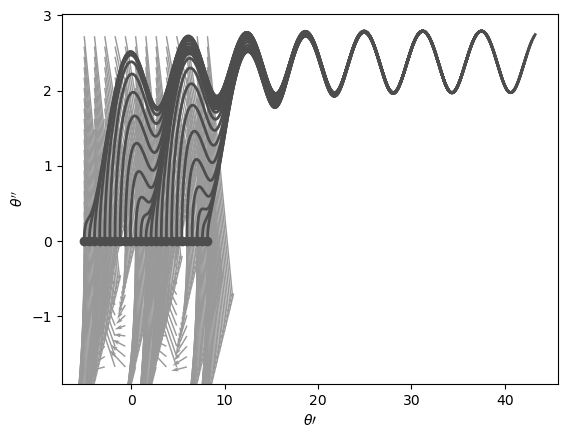

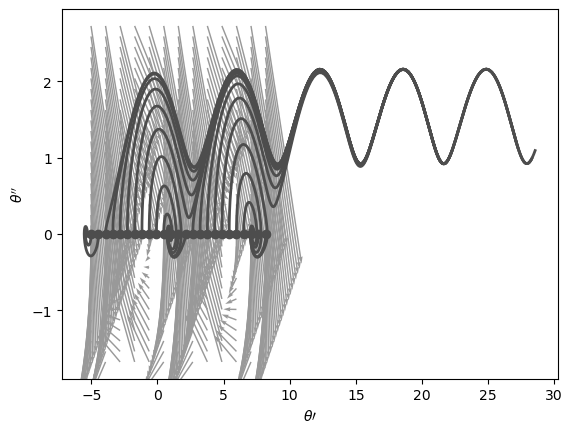

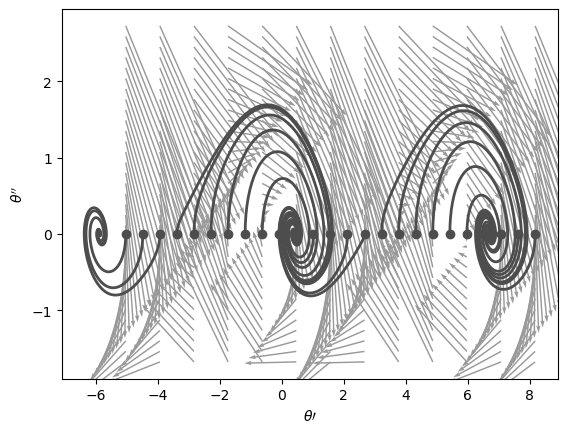

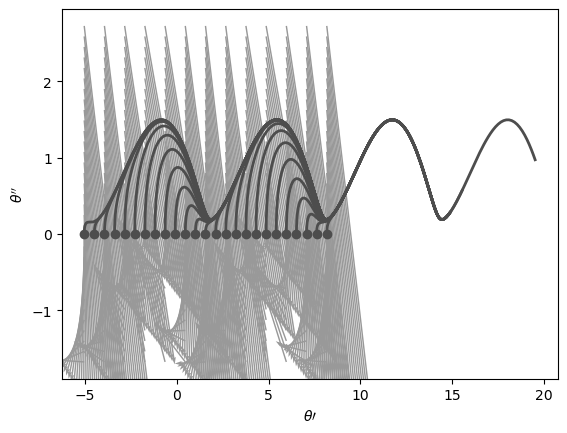

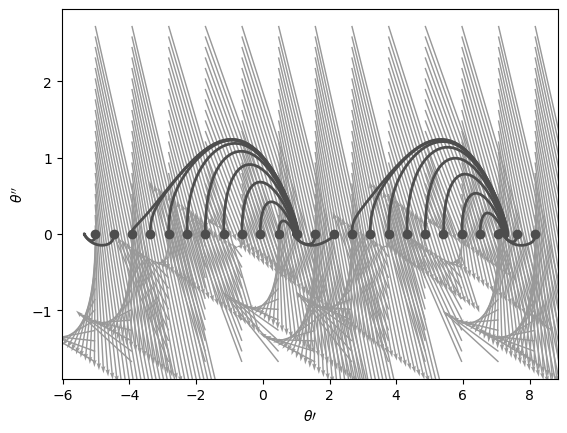

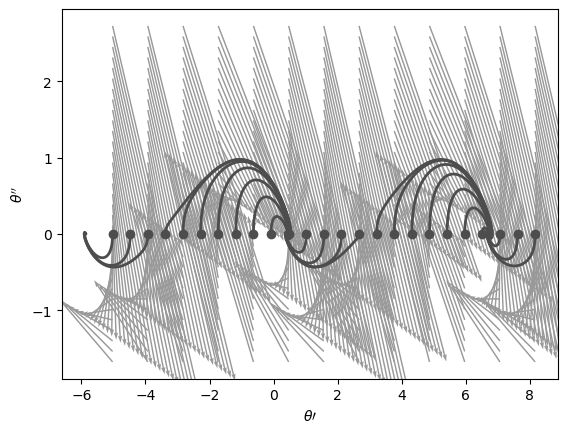

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

print('%% Task 8.5.2 --%%')

# Create grid
lval = [-1.6 * np.pi, 2.6 * np.pi]
x, y = np.meshgrid(
    np.linspace(lval[0], lval[1], 13), 
    np.linspace(lval[0] / 3, lval[1] / 3, 33)
)

def vectorfield(x, y, dx, dy, ax, *args, **kwargs):
    """Function to plot vector field"""
    ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, *args, **kwargs)

for alpha in [0.5, 1.3]:
    for I in [1.2, 0.8, 0.4]:
        # Differential equations
        dx = y
        dy = -I - alpha * y - np.sin(x)
        
        def dgl_sys(v, t):
            return [v[1], I - alpha * v[1] - np.sin(v[0])]

        # Prepare plot and draw vector field
        fig, ax = plt.subplots()
        vectorfield(x, y, dx, dy, ax, color='0.6')

        # Determine and plot numerical solutions
        ts = np.arange(0, 18.1, 0.1)

        for startx in np.linspace(lval[0], lval[1], 25):
            for starty in [0]:
                res = odeint(dgl_sys, [startx, starty], ts)
                ax.plot(res[0, 0], res[0, 1], 'o', 
                        markerfacecolor='0.3', markeredgecolor='0.3')
                ax.plot(res[:, 0], res[:, 1], linewidth=2, color='0.3')

        # Adjust axis labels
        ax.set_xlabel(r'$\theta \prime$')
        ax.set_ylabel(r'$\theta^{\prime \prime}$')

plt.show()